In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 3 - Les Tris

## IV. Le quicksort

Pour réaliser ce tri, on va choisir un **pivot** (dernier élément de la portion de liste considérée dans l'animation ci-dessous). Puis partitionner les différents éléments de la liste en deux populations:
* les éléments supérieurs au pivot (que l'on place à la fin de la portion de lsite considérée)
* les éléments inférieurs au pivot (que l'on place au début de la portion de liste considérée)

Ainsi, on a directement la position finale du pivot.
Il suffit ensuite de recommencer avec chaque portion de liste.

![tri rapide](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)


### Activité à réaliser
1. Proposer une implémentation de ce tri tel que proposé
2. Modifiez l'algorithme afin de prendre comme pivot
    * un élément aléatoire de la sous liste considérée
    * la médiane des 5 premiers éléments de la sous liste (si elle comporte au moins 5 éléments)

In [4]:
# 1.
def quicksort1(L):
    """
    tri la liste L par la méthode du quicksort
    tel que présenté dans l'animation ci-dessus
    """
    if len(L) <= 1:
        return L
    else:
        pivot = L[-1]
        petits = []
        grands = []
        milieu = []
        for element in L: # on balaye tout même le pivot
            if element == pivot:
                milieu.append(element)
            elif element > pivot:
                grands.append(element)
            else:
                petits.append(element)
        return quicksort1(petits) + milieu + quicksort1(grands)

In [5]:
from random import randint

def melange(n,p):
    L = [i for i in range(1, n+1)]
    for i in range(p):
        a = randint(0,n-1)
        b = randint(0,n-1)
        L[a], L[b] = L[b], L[a]
    return L

In [6]:
L = melange(10,10)
L

[9, 2, 7, 10, 3, 5, 4, 8, 1, 6]

In [7]:
quicksort1(L)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
from random import *

In [9]:
randint(0,100) # renvoie un entier tiré aléatoirement dans [0, 100]

100

In [10]:
print(L)
choice(L) # renvoie un élément de L choisi aléatoirement

[9, 2, 7, 10, 3, 5, 4, 8, 1, 6]


2

In [11]:
random() # renvoie un float aléatoire dans [0., 1.[

0.7448761537021965

In [12]:
# 2.a.
def quicksort2(L):
    """
    tri la liste L par la méthode du quicksort
    avec pivot aléatoire
    """
    n = len(L)
    if n <= 1:
        return L
    else:
        i = randint(0,n-1) # un indice aléatoire dans L
        pivot = L[i]
        petits = []
        grands = []
        milieu = []
        for element in L: # on balaye tout même le pivot
            if element == pivot:
                milieu.append(element)
            elif element > pivot:
                grands.append(element)
            else:
                petits.append(element)
        return quicksort2(petits) + milieu + quicksort2(grands)

In [13]:
a = 2
b = 1
tmp = a
a = b
b = tmp
a, b

(1, 2)

In [14]:
a = 2
b = 1
a, b = b, a
a, b

(1, 2)

In [15]:
# 2.b.
def mediane(L):
    assert len(L) == 5
    a, b, c, d, e = L
    if b < a:
        a,b = b,a
    if c < a:
        a,b,c = c,a,b
    elif c < b:
        b,c = c,b
    if d < a:
        a,b,c,d = d,a,b,c
    elif d < b:
        b,c,d = d,b,c
    elif d < c:
        c,d = d,c
    if e < b:
        return b
    elif e < c:
        return e
    else:
        return c
    
    

def quicksort3(L):
    """
    tri la liste L par la méthode du quicksort
    avec pivot mediane des 5 premiers
    """
    n = len(L)
    if n <= 1:
        return L
    else:
        if len(L)>=5:
            pivot = mediane(L[:5])
        else:
            pivot = L[-1]
        petits = []
        grands = []
        milieu = []
        for element in L: # on balaye tout même le pivot
            if element == pivot:
                milieu.append(element)
            elif element > pivot:
                grands.append(element)
            else:
                petits.append(element)
        return quicksort3(petits) + milieu + quicksort3(grands)       

In [16]:
L = melange(10,10)
L

[1, 4, 3, 5, 6, 8, 7, 9, 10, 2]

In [17]:
quicksort3(L)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Regardez la vidéo ci-dessous:

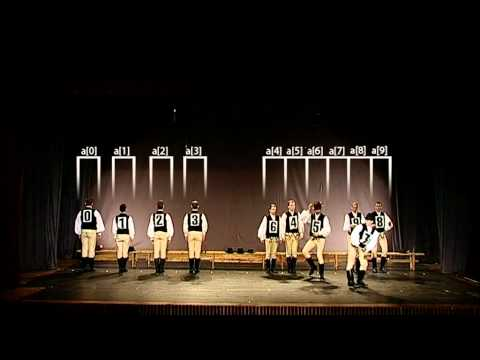

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo("ywWBy6J5gz8",width="640px", height="315px")


### Activité à réaliser
3. Proposez une implémentation de l'algorithme proposé dans cette vidéo

In [36]:
# 3.
def quicksort4(L, d = 0, f = None):
    """
    tri la liste L par la méthode du quicksort
    tel que présenté dans la vidéo
    """
    if f is None:
        f = len(L) -1
    if f <= d :
        return L
    else:
        pivot = d
        i = f
        sens = -1
        while i != pivot:
            if sens*L[i] > sens*L[pivot]:
                L[pivot], L[i] = L[i], L[pivot]
                pivot, i = i, pivot
                sens = -sens
            i += sens
        L = quicksort4(L,d,pivot-1)
        L = quicksort4(L,pivot+1,f)
        return L

In [34]:
L = melange(10,10)
L

[1, 8, 6, 3, 2, 7, 5, 9, 4, 10]

In [37]:
quicksort4(L)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

4. Réalisez une étude sur le temps d'exécution de ces tris pour une liste tirée aléatoirement.
5. Même question dans le cas d'une liste peu mélangée.

In [38]:
import matplotlib.pyplot as plt
from time import *

def trace(f, n, p):
    L = melange(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5
        y.append(temps)
    plt.plot(x,y,"+")
    plt.show()

In [39]:
# 4.
# quicksort1 => pivot à la fin
# quicksort2 => pivot aléatoire
# quicksort3 => pivot = médiane des 5 premiers
# quicksort4 => comme vidéo, tri en place

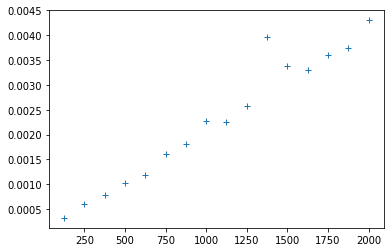

In [45]:
trace(quicksort1,2000,2000)

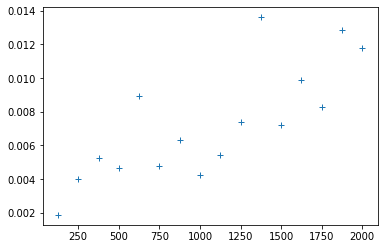

In [41]:
trace(quicksort1,2000,200)

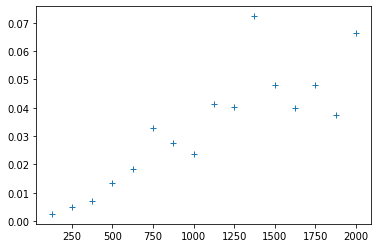

In [42]:
trace(quicksort1,2000,20)

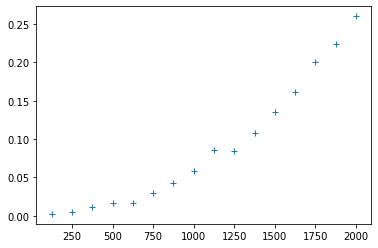

In [43]:
trace(quicksort1,2000,2)

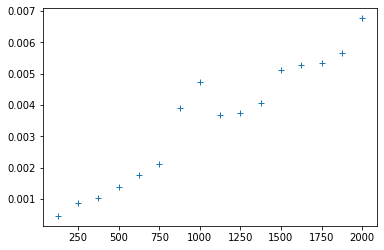

In [46]:
trace(quicksort2,2000,2000)

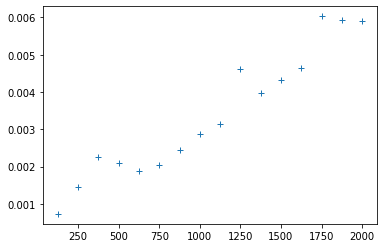

In [47]:
trace(quicksort2,2000,200)

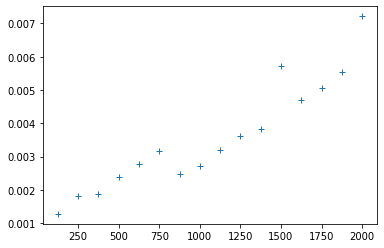

In [48]:
trace(quicksort2,2000,20)

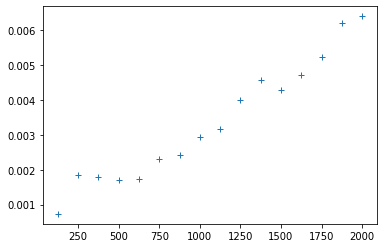

In [49]:
trace(quicksort2,2000,2)

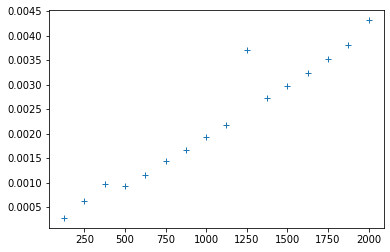

In [50]:
trace(quicksort3,2000,2000)

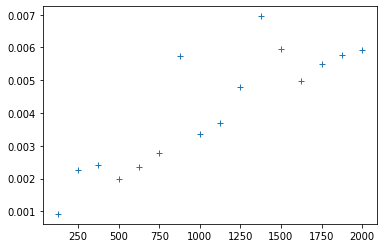

In [51]:
trace(quicksort3,2000,200)

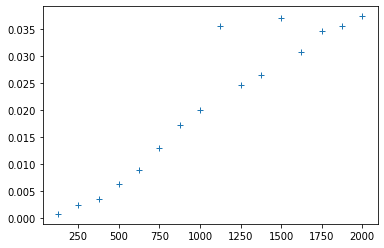

In [52]:
trace(quicksort3,2000,20)

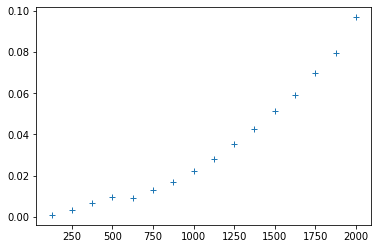

In [53]:
trace(quicksort3,2000,2)

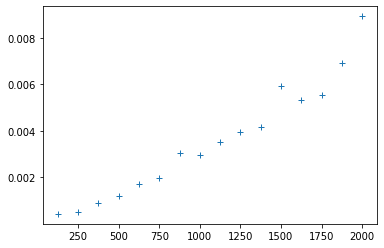

In [54]:
trace(quicksort4,2000,2000)

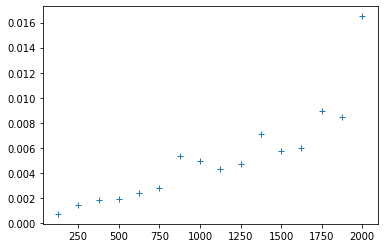

In [55]:
trace(quicksort4,2000,200)

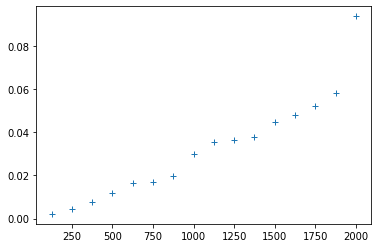

In [56]:
trace(quicksort4,2000,20)

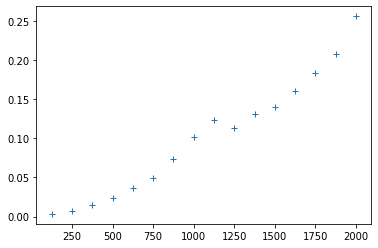

In [57]:
trace(quicksort4,2000,2)

In [24]:
# 5.
